In [6]:
# !pip install ultralytics

In [7]:
# !pip install labelme2yolo

In [8]:
# !pip install opencv-python-headless

In [9]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# GeoTiff Images
import rasterio
from osgeo import gdal

# Visualisation
from matplotlib import pyplot as plt
import matplotlib.image as img
from matplotlib.pyplot import figure
from PIL import Image
%matplotlib inline

# Model Building
import ultralytics
from ultralytics import YOLO
import labelme2yolo

# Others
import os
import shutil
import zipfile
import csv
from tqdm import tqdm

In [7]:
!labelme2yolo --json_dir ./training_data_6/

INFO:labelme2yolo:Converting train set ...
Converting... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:0000:0100:01
INFO:labelme2yolo:Converting val set ...
Converting... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00m 0:00:01
INFO:labelme2yolo:Converting test set ...
Converting... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   0% -:--:--


In [8]:
def copy_files(source_dir, dest_dir):
    for filename in tqdm(os.listdir(source_dir)):
        if os.path.isfile(os.path.join(source_dir, filename)):
            source_path = os.path.join(source_dir, filename)
            destination_path = os.path.join(dest_dir, filename)
            shutil.copy2(source_path, destination_path)

In [9]:
#copy images
source_train = os.getcwd() + '/training_data_6/YOLODataset/images/train'
source_val = os.getcwd() + '/training_data_6/YOLODataset/images/val'

train_dir = os.getcwd() + '/training_data_6/YOLODataset/datasets/train'
val_dir = os.getcwd() + '/training_data_6/YOLODataset/datasets/val'
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

copy_files(source_train, train_dir)
copy_files(source_val, val_dir)

100%|██████████| 74/74 [00:00<00:00, 2410.91it/s]


In [10]:
#copy labels
source_train = os.getcwd() + '/training_data_6/YOLODataset/labels/train'
source_val = os.getcwd() + '/training_data_6/YOLODataset/labels/val'
copy_files(source_train, train_dir)
copy_files(source_val, val_dir)

100%|██████████| 74/74 [00:00<00:00, 5353.11it/s]


In [11]:
#Loading the model
model = YOLO('yolov8n.pt')

100%|██████████| 6.23M/6.23M [00:00<00:00, 284MB/s]


In [12]:
# Display model information (optional)
model.info()

YOLOv8n summary: 225 layers, 3157200 parameters, 0 gradients, 8.9 GFLOPs


(225, 3157200, 0, 8.8575488)

In [13]:
#changing yaml directory links
with open(os.getcwd()+'/training_data_6/YOLODataset/dataset.yaml', 'r') as file:
    lines = file.readlines()
lines[0] = 'train: ./datasets/train' + '\n'
lines[1] = 'val: ./datasets/val' + '\n'
with open(os.getcwd()+'/training_data_6/YOLODataset/dataset.yaml', 'w') as file:
    file.writelines(lines)

In [ ]:
# Train the model on the dataset for recommended initial 300 epochs
all_data_yaml = os.getcwd()+'/training_data_6/YOLODataset/dataset.yaml'
results = model.train(data=all_data_yaml, epochs=300, imgsz=512)

Ultralytics YOLOv8.1.24 🚀 Python-3.11.4 torch-2.2.1+cu121 CPU (Intel Xeon Platinum 8370C 2.80GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/home/jovyan/PlanetaryComputerExamples/EYOpenScience/model_development_6/training_data_6/YOLODataset/dataset.yaml, epochs=300, time=None, patience=100, batch=16, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fram

train: Scanning /home/jovyan/PlanetaryComputerExamples/EYOpenScience/model_development_6/training_data_6/YOLODataset/datasets/train... 296 images, 0 backgrounds, 0 corrupt: 100%|██████████| 296/296 [00:00<00:00, 669.11it/s]

train: New cache created: /home/jovyan/PlanetaryComputerExamples/EYOpenScience/model_development_6/training_data_6/YOLODataset/datasets/train.cache



val: Scanning /home/jovyan/PlanetaryComputerExamples/EYOpenScience/model_development_6/training_data_6/YOLODataset/datasets/val... 74 images, 0 backgrounds, 0 corrupt: 100%|██████████| 74/74 [00:00<00:00, 685.75it/s]

val: New cache created: /home/jovyan/PlanetaryComputerExamples/EYOpenScience/model_development_6/training_data_6/YOLODataset/datasets/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 512 train, 512 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 300 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/300         0G      1.777      3.808      1.512        242        512: 100%|██████████| 19/19 [00:56<00:00,  2.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.33s/it]

                   all         74       1533       0.01      0.153     0.0231    0.00971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/300         0G      1.623      2.479      1.288        144        512: 100%|██████████| 19/19 [00:54<00:00,  2.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.32s/it]

                   all         74       1533      0.787      0.108       0.18     0.0907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/300         0G      1.579      2.021      1.259        269        512: 100%|██████████| 19/19 [00:55<00:00,  2.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]

                   all         74       1533      0.491      0.244      0.217      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/300         0G      1.543      1.756      1.228        222        512: 100%|██████████| 19/19 [00:54<00:00,  2.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]

                   all         74       1533      0.218      0.353      0.234       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/300         0G      1.506      1.607      1.239        226        512: 100%|██████████| 19/19 [00:54<00:00,  2.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]

                   all         74       1533      0.195       0.36       0.23      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/300         0G      1.499      1.532      1.236        202        512: 100%|██████████| 19/19 [00:55<00:00,  2.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.44s/it]

                   all         74       1533       0.25      0.318      0.228      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/300         0G        1.5      1.549      1.225        343        512: 100%|██████████| 19/19 [00:55<00:00,  2.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]

                   all         74       1533      0.187      0.406       0.26      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/300         0G      1.444      1.474      1.212        451        512:  79%|███████▉  | 15/19 [00:43<00:11,  2.97s/it]

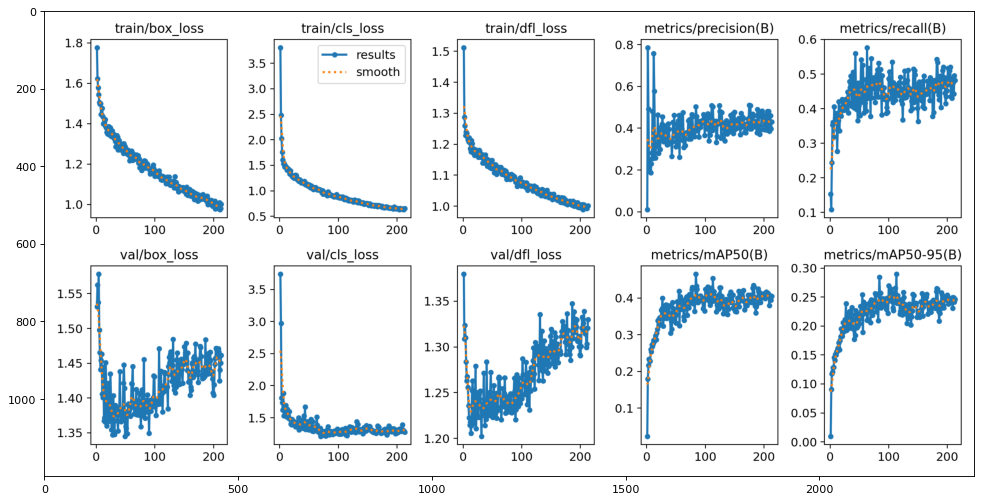

In [10]:
figure(figsize=(15, 10), dpi=80)
# reading the image 
results = img.imread('./runs/detect/train/results.png')   
# displaying the image 
plt.imshow(results)

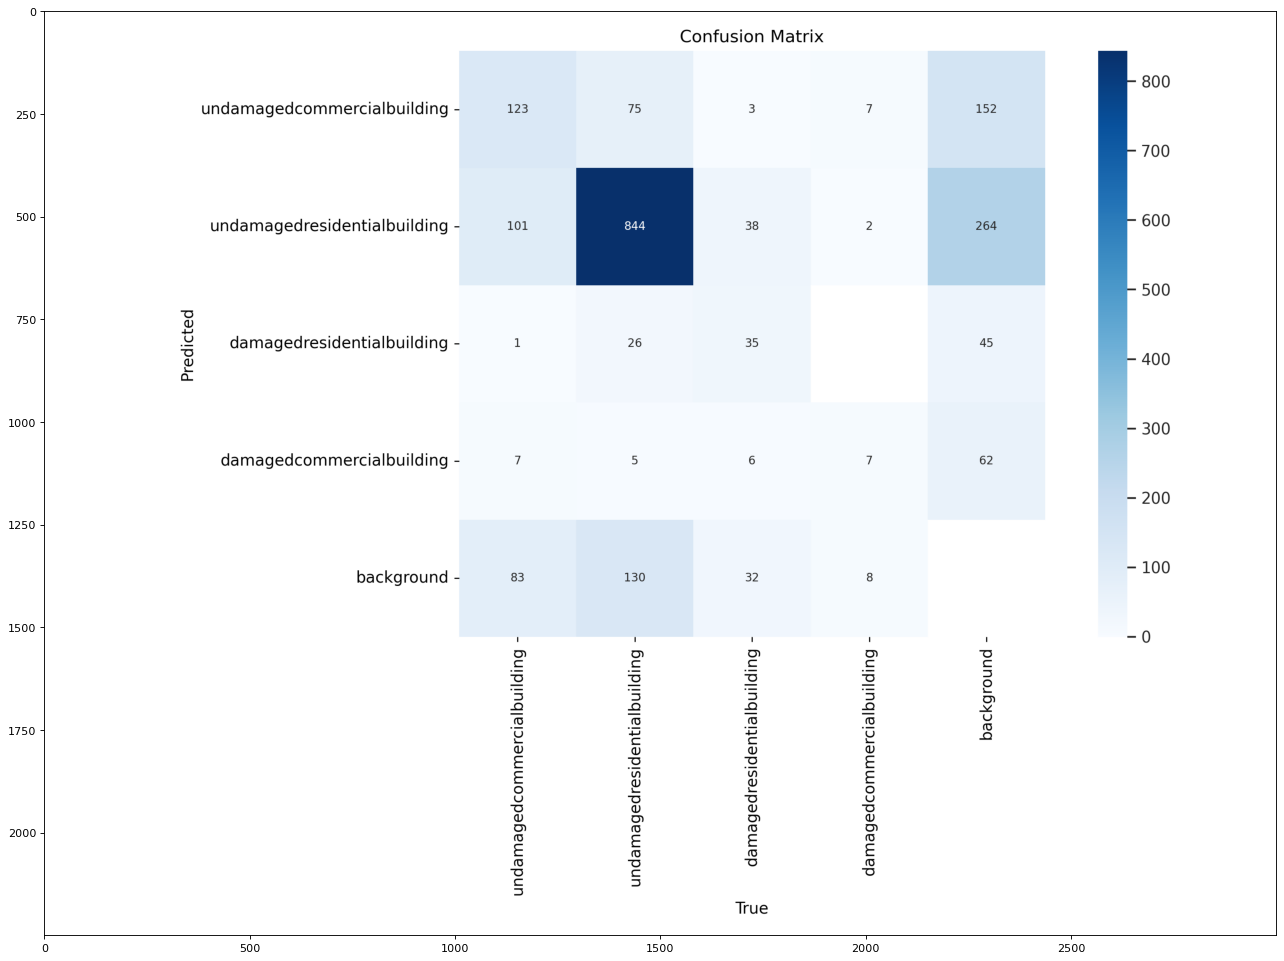

In [11]:
figure(figsize=(20,15), dpi=80)  
# reading the image 
cf = img.imread('./runs/detect/train/confusion_matrix.png') 
# displaying the image 
plt.imshow(cf)

In [12]:
!cp -rf ./../model_development_2/challenge_1_submission_images/ ./challenge_1_submission_images

In [13]:
# Load the Model
model = YOLO('./runs/detect/train/weights/best.pt')

In [14]:
# Decoding according to the .yaml file class names order
decoding_of_predictions ={0: 'undamagedcommercialbuilding', 1: 'undamagedresidentialbuilding', 2: 'damagedresidentialbuilding', 3: 'damagedcommercialbuilding'}

directory = 'challenge_1_submission_images/'
# Directory to store outputs
results_directory = './Validation_Data_Results'

# Create submission directory if it doesn't exist
if not os.path.exists(results_directory):
    os.makedirs(results_directory)

# Loop through each file in the directory
for filename in os.listdir(directory):
    # Check if the current object is a file and ends with .jpeg
    if os.path.isfile(os.path.join(directory, filename)) and filename.lower().endswith('.jpg'):
        # Perform operations on the file
        file_path = os.path.join(directory, filename)
        print(file_path)
        print("Making a prediction on ", filename)
        results = model.predict(file_path, save=True, iou=0.5, save_txt=True, conf=0.25)
        
        for r in results:
            conf_list = r.boxes.conf.numpy().tolist()
            clss_list = r.boxes.cls.numpy().tolist()
            original_list = clss_list
            updated_list = []
            for element in original_list:
                 updated_list.append(decoding_of_predictions[int(element)])

        bounding_boxes = r.boxes.xyxy.numpy()
        confidences = conf_list
        class_names = updated_list

        # Check if bounding boxes, confidences and class names match
        if len(bounding_boxes) != len(confidences) or len(bounding_boxes) != len(class_names):
            print("Error: Number of bounding boxes, confidences, and class names should be the same.")
            continue
        text_file_name = os.path.splitext(filename)[0]
        # Creating a new .txt file for each image in the submission_directory
        with open(os.path.join(results_directory, f"{text_file_name}.txt"), "w") as file:
            for i in range(len(bounding_boxes)):
                # Get coordinates of each bounding box
                left, top, right, bottom = bounding_boxes[i]
                # Write content to file in desired format
                file.write(f"{class_names[i]} {confidences[i]} {left} {top} {right} {bottom}\n")
        print("Output files generated successfully.")

challenge_1_submission_images/Validation_Post_Event_008.jpg
Making a prediction on  Validation_Post_Event_008.jpg

image 1/1 /home/jovyan/PlanetaryComputerExamples/EYOpenScience/model_development_6/challenge_1_submission_images/Validation_Post_Event_008.jpg: 512x512 2 undamagedcommercialbuildings, 8 undamagedresidentialbuildings, 3 damagedresidentialbuildings, 1 damagedcommercialbuilding, 80.3ms
Speed: 1.6ms preprocess, 80.3ms inference, 1.3ms postprocess per image at shape (1, 3, 512, 512)
Results saved to runs/detect/predict
1 label saved to runs/detect/predict/labels
Output files generated successfully.
challenge_1_submission_images/Validation_Post_Event_002.jpg
Making a prediction on  Validation_Post_Event_002.jpg

image 1/1 /home/jovyan/PlanetaryComputerExamples/EYOpenScience/model_development_6/challenge_1_submission_images/Validation_Post_Event_002.jpg: 512x512 1 undamagedcommercialbuilding, 9 undamagedresidentialbuildings, 6 damagedresidentialbuildings, 2 damagedcommercialbuild

In [15]:
# Define your source directory and the destination where the zip file will be created
source_dir = results_directory
destination_zip = 'submission'

# Create a zip file from the directory
shutil.make_archive(destination_zip, 'zip', source_dir)

print(f"Directory {source_dir} has been successfully zipped into {destination_zip}.")

Directory ./Validation_Data_Results has been successfully zipped into submission.
